# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [2]:
df = pd.read_excel('prediction.xlsx')

In [3]:
#test_file = pd.read_excel('test_file.xlsx')

# EDA

In [4]:
df.shape

(8986, 29)

In [5]:
df.columns

Index(['project number ', 'Sub agency', 'project category', 'project priorty ',
       'current cost ', 'post payment', 'approved payments ', 'paid payments',
       'contractor id ', 'is there any pulled contractor',
       'total payment for prev contract', 'prev contractor etimad ref ',
       'project status', 'progress measure', 'current progress',
       'planned progress', 'actual start date ', 'original end date ',
       'planned end date ', 'excpected end date ',
       'actual end date (first phase)', 'actual end date (last phase)',
       'main reason of failure ', 'prosedure ', 'longtitude ', 'latitude ',
       'final project status ', 'dept', 'percentage %'],
      dtype='object')

In [6]:
df.dtypes

project number                            float64
Sub agency                                 object
project category                           object
project priorty                            object
current cost                              float64
post payment                              float64
approved payments                         float64
paid payments                             float64
contractor id                             float64
is there any pulled contractor             object
total payment for prev contract           float64
prev contractor etimad ref                float64
project status                             object
progress measure                           object
current progress                          float64
planned progress                          float64
actual start date                  datetime64[ns]
original end date                  datetime64[ns]
planned end date                   datetime64[ns]
excpected end date                 datetime64[ns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8986 entries, 0 to 8985
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   project number                   8985 non-null   float64       
 1   Sub agency                       8985 non-null   object        
 2   project category                 8985 non-null   object        
 3   project priorty                  8945 non-null   object        
 4   current cost                     8985 non-null   float64       
 5   post payment                     8985 non-null   float64       
 6   approved payments                8985 non-null   float64       
 7   paid payments                    8985 non-null   float64       
 8   contractor id                    8985 non-null   float64       
 9   is there any pulled contractor   8938 non-null   object        
 10  total payment for prev contract  8985 non-null   float64    

In [8]:
df.head()

,project number,Sub agency,project category,project priorty,current cost,post payment,approved payments,paid payments,contractor id,is there any pulled contractor,...,excpected end date,actual end date (first phase),actual end date (last phase),main reason of failure,prosedure,longtitude,latitude,final project status,dept,percentage %
0,2.100075e+09,أمانة / الرياض,تشييد,ذات اولوية متوسطة,1.000000e+07,5.000000e+05,8.707681e+06,8.707681e+06,1.010144e+09,لا,...,2022-10-10,2021-05-04,NaT,NaN,NaN,46.682740,24.703170,منجز,No,NaN
1,2.200227e+09,أمانة / حفر الباطن,تشييد,ذات اولوية عالية,3.864000e+05,1.932000e+04,3.864000e+05,3.864000e+05,1.010288e+09,لا,...,2022-08-01,2023-02-14,NaT,NaN,NaN,45.962711,28.378415,منجز,No,NaN
2,2.100195e+09,رئاسة أمن الدولة / ديوان رئاسة أمن الدولة,تشييد,ذات اولوية عالية وعاجلة,1.262265e+06,6.311324e+04,1.262265e+06,1.262265e+06,1.010238e+09,لا,...,2021-10-31,2021-10-31,NaT,NaN,NaN,46.676090,24.698800,منجز,No,NaN
3,2.100038e+09,وزارة الصحة / التجمع الاول,تشييد,ذات اولوية عالية,2.707908e+08,1.353954e+07,2.417567e+08,2.417567e+08,1.010120e+09,لا,...,2010-10-09,2010-09-24,NaT,ضعف كفاءة المقاول الفنية,NaN,46.689360,24.627360,منجز,No,NaN
4,2.200213e+09,وزارة الحرس الوطني / وكالة الشؤون الفنية,توريد وتركيب,ذات اولوية عالية,4.967252e+05,2.483626e+04,1.579364e+05,1.579364e+05,1.010216e+09,لا,...,2023-03-01,NaT,NaT,NaN,تم إنذار المقاول كتابيا,46.908370,24.691650,Failed,No,NaN


In [9]:
df.columns

Index(['project number ', 'Sub agency', 'project category', 'project priorty ',
       'current cost ', 'post payment', 'approved payments ', 'paid payments',
       'contractor id ', 'is there any pulled contractor',
       'total payment for prev contract', 'prev contractor etimad ref ',
       'project status', 'progress measure', 'current progress',
       'planned progress', 'actual start date ', 'original end date ',
       'planned end date ', 'excpected end date ',
       'actual end date (first phase)', 'actual end date (last phase)',
       'main reason of failure ', 'prosedure ', 'longtitude ', 'latitude ',
       'final project status ', 'dept', 'percentage %'],
      dtype='object')

In [10]:
(df['is there any pulled contractor'].unique())

array(['لا', 'نعم', nan], dtype=object)

In [11]:
(df['project status'].unique())
#['Completed - Initial Receipt', 'Ongoing', 'Withdrawn', 'Completed - Final Receipt',
#       'Initial receiving', 'total stop', 'contract termination', 'has not started',
#       'partial stop', nan]

array(['منجز – استلام ابتدائي', 'جاري', 'مسحوب', 'منجز – استلام نهائي',
       'جاري الاستلام الإبتدائي', 'ايقاف كلي', 'فسخ العقد', 'لم يبدأ',
       'ايقاف جزئي', nan], dtype=object)

In [12]:
(df['progress measure'].unique())

#['Quantities installed', 'Cost of work performed', 'Others',
#       'Earned value methodology', 'Billed cost',
#       'work hour payments', nan]
#

array(['الكميات التي تم تركيبها', 'تكلفة العمل المنجز', 'اخرى',
       'منهجية القيمة المكتسبة', 'التكلفة المفوترة',
       'مدفوعات ساعات العمل', nan], dtype=object)

In [13]:
(df['main reason of failure '].unique())

array([nan, 'ضعف \xa0كفاءة المقاول الفنية', 'أوامر تغيير', 'اخرى',
       'أحداث غير متوقعة : الطقس/ إجازات / مشاكل حفر... الخ',
       'تأخرصرف المستحقات المالية',
       'ضعف كفاءة المقاول المالية لتسيير الأعمال', 'لا يوجد تأخير',
       'عدم اكتمال أو ضعف أعمال التصميم والدراسات',
       'التنسيق مع أصحاب المصلحه (خدمات', 'تصاريح أعمال التنفيذ',
       'عدم واقعية الجدول الزمني', 'تغيرات في نطاق المشروع',
       'عدم وجود مبالغ في البنود تغطي الأعمال المرصودة', 'نزع الملكيات',
       'أوامر سامية', 'ضعف اداء الاستشاري', 'منازعات قائمة',
       'سوء التخطيط الاولي للمشروع',
       'المشروع ليس ذو أولوية في الوقت الحالي',
       'عدم وجود كوادر كافية في الجهه لادارة المشروع', 'موافقات'],
      dtype=object)

In [14]:
(df['final project status '].unique())
#'done', 'failed', 'late', 'regular', 'withdrawn', 'public services', nan]

array(['منجز', 'Failed', 'متأخر', 'منتظم', 'مسحوب', 'خدمات عامة', nan],
      dtype=object)

In [15]:
(df['dept'].unique())

array(['No', 'Yes'], dtype=object)

In [16]:
df.isnull().any()

project number                      True
Sub agency                          True
project category                    True
project priorty                     True
current cost                        True
post payment                        True
approved payments                   True
paid payments                       True
contractor id                       True
is there any pulled contractor      True
total payment for prev contract     True
prev contractor etimad ref          True
project status                      True
progress measure                    True
current progress                    True
planned progress                    True
actual start date                   True
original end date                   True
planned end date                    True
excpected end date                  True
actual end date (first phase)       True
actual end date (last phase)        True
main reason of failure              True
prosedure                           True
longtitude      

In [17]:
df.isnull().sum()

project number                        1
Sub agency                            1
project category                      1
project priorty                      41
current cost                          1
post payment                          1
approved payments                     1
paid payments                         1
contractor id                         1
is there any pulled contractor       48
total payment for prev contract       1
prev contractor etimad ref         4840
project status                        1
progress measure                      1
current progress                      1
planned progress                      1
actual start date                    12
original end date                     6
planned end date                     18
excpected end date                   12
actual end date (first phase)      5474
actual end date (last phase)       8510
main reason of failure             2796
prosedure                          8620
longtitude                          406


# Preprocessing

In [18]:
df.drop(['percentage %','main reason of failure ','actual end date (first phase)','actual end date (last phase)','prev contractor etimad ref ','prosedure ',], axis =1, inplace =True)

In [19]:
df.isnull().sum()

project number                       1
Sub agency                           1
project category                     1
project priorty                     41
current cost                         1
post payment                         1
approved payments                    1
paid payments                        1
contractor id                        1
is there any pulled contractor      48
total payment for prev contract      1
project status                       1
progress measure                     1
current progress                     1
planned progress                     1
actual start date                   12
original end date                    6
planned end date                    18
excpected end date                  12
longtitude                         406
latitude                           407
final project status                 1
dept                                 0
dtype: int64

In [20]:
df.dtypes

project number                            float64
Sub agency                                 object
project category                           object
project priorty                            object
current cost                              float64
post payment                              float64
approved payments                         float64
paid payments                             float64
contractor id                             float64
is there any pulled contractor             object
total payment for prev contract           float64
project status                             object
progress measure                           object
current progress                          float64
planned progress                          float64
actual start date                  datetime64[ns]
original end date                  datetime64[ns]
planned end date                   datetime64[ns]
excpected end date                 datetime64[ns]
longtitude                                float64


In [21]:
df['Sub agency'] = df['Sub agency'].fillna(df['Sub agency'].mode()[0])
df['project category'] = df['project category'].fillna(df['project category'].mode()[0])
df['project priorty '] = df['project priorty '].fillna(df['project priorty '].mode()[0])
df['is there any pulled contractor'] = df['is there any pulled contractor'].fillna(df['is there any pulled contractor'].mode()[0])
df['project status'] = df['project status'].fillna(df['project status'].mode()[0])
df['progress measure'] = df['progress measure'].fillna(df['progress measure'].mode()[0])
df['final project status '] = df['final project status '].fillna(df['final project status '].mode()[0])
df['actual start date '] = df['actual start date '].fillna(df['actual start date '].mode()[0])
df['original end date '] = df['original end date '].fillna(df['original end date '].mode()[0])
df['planned end date '] = df['planned end date '].fillna(df['planned end date '].mode()[0])
df['excpected end date '] = df['excpected end date '].fillna(df['excpected end date '].mode()[0])

In [22]:
df['project number '] = df['project number '].fillna(df['project number '].median())
df['current cost '] = df['current cost '].fillna(df['current cost '].mean())
df['post payment'] = df['post payment'].fillna(df['post payment'].mean())
df['approved payments '] = df['approved payments '].fillna(df['approved payments '].mean())
df['paid payments'] = df['paid payments'].fillna(df['paid payments'].mean())
df['contractor id '] = df['contractor id '].fillna(df['contractor id '].median())
df['total payment for prev contract'] = df['total payment for prev contract'].fillna(df['total payment for prev contract'].mean())
df['current progress'] = df['current progress'].fillna(df['current progress'].mean())
df['planned progress'] = df['planned progress'].fillna(df['planned progress'].mean())
df['longtitude '] = df['longtitude '].fillna(df['longtitude '].mean())
df['latitude '] = df['latitude '].fillna(df['latitude '].mean())


In [23]:
df.isnull().sum()

project number                     0
Sub agency                         0
project category                   0
project priorty                    0
current cost                       0
post payment                       0
approved payments                  0
paid payments                      0
contractor id                      0
is there any pulled contractor     0
total payment for prev contract    0
project status                     0
progress measure                   0
current progress                   0
planned progress                   0
actual start date                  0
original end date                  0
planned end date                   0
excpected end date                 0
longtitude                         0
latitude                           0
final project status               0
dept                               0
dtype: int64

# Feature Engineering

In [24]:
# Assuming 'data' is the DataFrame containing the project data
df['actual start date '] = pd.to_datetime(df['actual start date '])
df['original end date '] = pd.to_datetime(df['original end date '])

# Extract year, month, and day components
df['Start Year'] = df['actual start date '].dt.year
df['Start Month'] = df['actual start date '].dt.month
df['Start Day'] = df['actual start date '].dt.day

df['End Year'] = df['original end date '].dt.year
df['End Month'] = df['original end date '].dt.month
df['End Day'] = df['original end date '].dt.day

# Calculate duration
df['Duration'] = (df['original end date '] - df['actual start date ']).dt.days

# Additional features from duration (optional)
df['Duration Weeks'] = df['Duration'] / 7
df['Duration Months'] = df['Duration'] / 30

In [25]:
# Assuming 'data' is the DataFrame containing the project data
df['planned end date '] = pd.to_datetime(df['planned end date '])
df['excpected end date '] = pd.to_datetime(df['excpected end date '])

# Calculate delay
df['Delay'] = (df['excpected end date '] - df['planned end date ']).dt.days

# Additional features from delay (optional)
df['Delay Weeks'] = df['Delay'] / 7
df['Delay Months'] = df['Delay'] / 30
df['Delayed'] = (df['Delay'] > 0).astype(int)

In [26]:
# Assuming 'data' is the DataFrame containing the project data
df['original end date '] = pd.to_datetime(df['original end date '])
df['actual start date '] = pd.to_datetime(df['actual start date '])

# Calculate delay
df['Delay'] = (df['actual start date '] - df['original end date ']).dt.days

# Additional features from delay (optional)
df['Delayed'] = (df['Delay'] > 0).astype(int)


In [27]:
df.drop(['actual start date ','original end date ','planned end date ','excpected end date '], axis =1, inplace =True)

In [28]:
df.head()

,project number,Sub agency,project category,project priorty,current cost,post payment,approved payments,paid payments,contractor id,is there any pulled contractor,...,End Year,End Month,End Day,Duration,Duration Weeks,Duration Months,Delay,Delay Weeks,Delay Months,Delayed
0,2.100075e+09,أمانة / الرياض,تشييد,ذات اولوية متوسطة,1.000000e+07,5.000000e+05,8.707681e+06,8.707681e+06,1.010144e+09,لا,...,2021,5,4,540,77.142857,18.000000,-540,0.0,0.0,0
1,2.200227e+09,أمانة / حفر الباطن,تشييد,ذات اولوية عالية,3.864000e+05,1.932000e+04,3.864000e+05,3.864000e+05,1.010288e+09,لا,...,2023,2,14,355,50.714286,11.833333,-355,0.0,0.0,0
2,2.100195e+09,رئاسة أمن الدولة / ديوان رئاسة أمن الدولة,تشييد,ذات اولوية عالية وعاجلة,1.262265e+06,6.311324e+04,1.262265e+06,1.262265e+06,1.010238e+09,لا,...,2021,10,31,905,129.285714,30.166667,-905,0.0,0.0,0
3,2.100038e+09,وزارة الصحة / التجمع الاول,تشييد,ذات اولوية عالية,2.707908e+08,1.353954e+07,2.417567e+08,2.417567e+08,1.010120e+09,لا,...,2010,9,24,1062,151.714286,35.400000,-1062,0.0,0.0,0
4,2.200213e+09,وزارة الحرس الوطني / وكالة الشؤون الفنية,توريد وتركيب,ذات اولوية عالية,4.967252e+05,2.483626e+04,1.579364e+05,1.579364e+05,1.010216e+09,لا,...,2022,2,10,86,12.285714,2.866667,-86,0.0,0.0,0


In [29]:
df['final project status '].value_counts()

منجز          3799
مسحوب         1861
Failed        1706
متأخر          672
منتظم          638
خدمات عامة     310
Name: final project status , dtype: int64

In [30]:
df.dtypes

project number                     float64
Sub agency                          object
project category                    object
project priorty                     object
current cost                       float64
post payment                       float64
approved payments                  float64
paid payments                      float64
contractor id                      float64
is there any pulled contractor      object
total payment for prev contract    float64
project status                      object
progress measure                    object
current progress                   float64
planned progress                   float64
longtitude                         float64
latitude                           float64
final project status                object
dept                                object
Start Year                           int64
Start Month                          int64
Start Day                            int64
End Year                             int64
End Month  

In [31]:
df['Sub agency'] = df['Sub agency'].astype('category').cat.codes
df['project category'] = df['project category'].astype('category').cat.codes
df['project priorty '] = df['project priorty '].astype('category').cat.codes
df['is there any pulled contractor'] = df['is there any pulled contractor'].astype('category').cat.codes
df['project status'] = df['project status'].astype('category').cat.codes
df['progress measure'] = df['progress measure'].astype('category').cat.codes
df['dept'] = df['dept'].astype('category').cat.codes

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8986 entries, 0 to 8985
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   project number                   8986 non-null   float64
 1   Sub agency                       8986 non-null   int16  
 2   project category                 8986 non-null   int8   
 3   project priorty                  8986 non-null   int8   
 4   current cost                     8986 non-null   float64
 5   post payment                     8986 non-null   float64
 6   approved payments                8986 non-null   float64
 7   paid payments                    8986 non-null   float64
 8   contractor id                    8986 non-null   float64
 9   is there any pulled contractor   8986 non-null   int8   
 10  total payment for prev contract  8986 non-null   float64
 11  project status                   8986 non-null   int8   
 12  progress measure    

In [33]:
df.iloc[:,10:]

,total payment for prev contract,project status,progress measure,current progress,planned progress,longtitude,latitude,final project status,dept,Start Year,...,End Year,End Month,End Day,Duration,Duration Weeks,Duration Months,Delay,Delay Weeks,Delay Months,Delayed
0,0.0,7,2,100.0,100.00,46.682740,24.703170,منجز,0,2019,...,2021,5,4,540,77.142857,18.000000,-540,0.0,0.0,0
1,0.0,7,3,100.0,100.00,45.962711,28.378415,منجز,0,2022,...,2023,2,14,355,50.714286,11.833333,-355,0.0,0.0,0
2,0.0,7,2,100.0,100.00,46.676090,24.698800,منجز,0,2019,...,2021,10,31,905,129.285714,30.166667,-905,0.0,0.0,0
3,0.0,7,3,98.0,100.00,46.689360,24.627360,منجز,0,2007,...,2010,9,24,1062,151.714286,35.400000,-1062,0.0,0.0,0
4,0.0,2,2,43.0,100.00,46.908370,24.691650,Failed,0,2021,...,2022,2,10,86,12.285714,2.866667,-86,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8981,0.0,2,5,96.4,95.95,39.826100,21.466000,منتظم,0,2018,...,2020,10,15,730,104.285714,24.333333,-730,0.0,0.0,0
8982,0.0,2,2,3.0,9.73,46.710877,24.628637,متأخر,0,2022,...,2024,11,27,731,104.428571,24.366667,-731,0.0,0.0,0
8983,0.0,0,0,45.0,62.00,46.710877,24.628637,متأخر,0,2022,...,2023,6,8,485,69.285714,16.166667,-485,0.0,0.0,0
8984,0.0,2,2,5.0,62.50,46.710877,24.628637,Failed,0,2022,...,2023,4,28,236,33.714286,7.866667,-236,0.0,0.0,0


# Find correlation

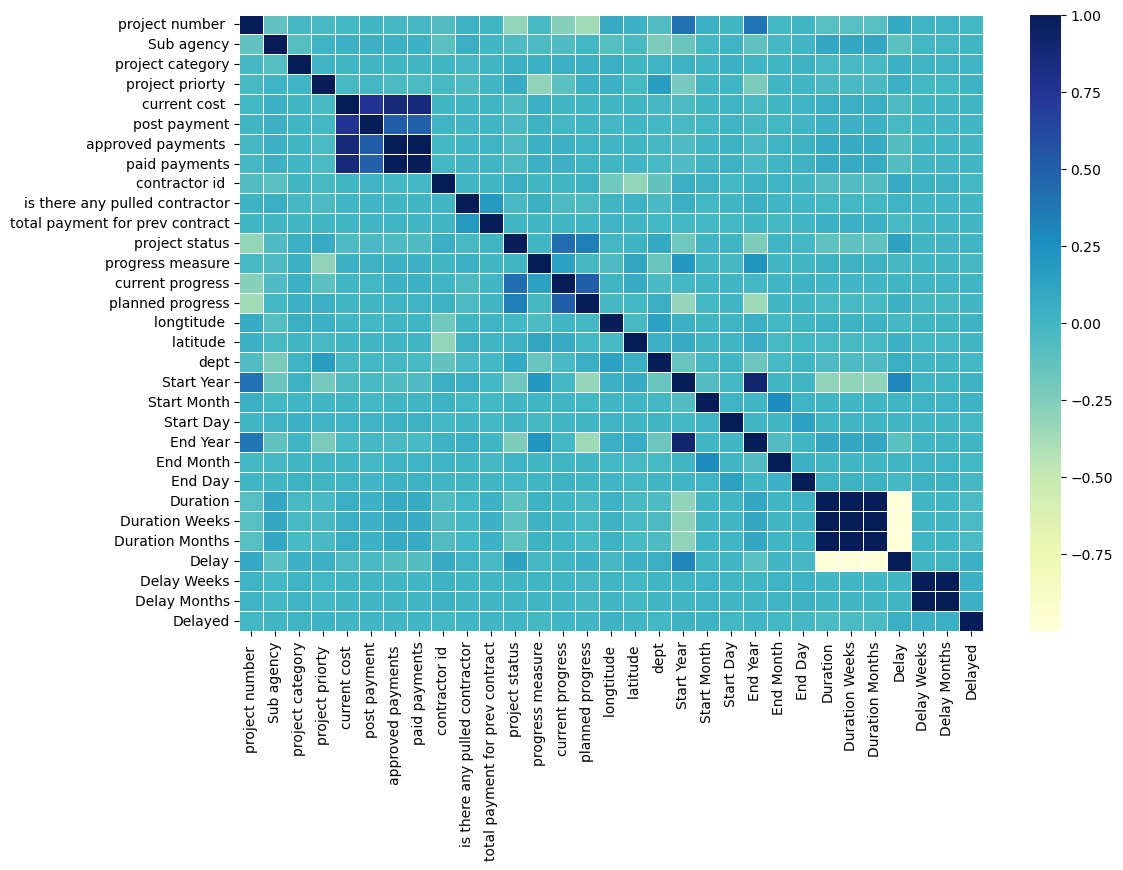

In [34]:
 # Find correlation
corr = df.corr()

# plot the heatmap
plt.figure(figsize = (12,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        linewidth=0.5,
        yticklabels=corr.columns,
           cmap="YlGnBu")
plt.show()

In [35]:
#Features
#loc[what rows, what cols]
X = df.loc[:,df.columns != 'final project status ']
#Response
y = df['final project status '].values

# Split into training and Testing sets with 80% training and 20% testing rows

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=101)  

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7188, 31), (1798, 31), (7188,), (1798,))

# Data Scaling

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Training of Random Forest Classifier:

In [39]:
Rf_classifier = RandomForestClassifier(n_estimators = 1000)

Rf_classifier.fit(X_train_scaled, y_train)

y_pred_rf = Rf_classifier.predict(X_test_scaled)

# Display the Final project Status for test set:

In [40]:
y_pred_rf

array(['Failed', 'منجز', 'Failed', ..., 'منجز', 'Failed', 'منتظم'],
      dtype=object)

# Evaluation of Random Forest

In [41]:
accu_rf = accuracy_score(y_pred_rf, y_test)

# Print the prediction accuracy
print('Test Accuracy Random Forest Classifier :', accu_rf)

Test Accuracy Random Forest Classifier : 0.9026696329254728


# Predict the Probability of Failure of a project in Testing set:

In [42]:
y_pred_rf = Rf_classifier.predict_proba(X_test_scaled)
y_pred_rf = pd.DataFrame(y_pred_rf, columns = None)
y_pred_rf = y_pred_rf.iloc[:, 2:3]
y_pred_rf


,2
0,0.223
1,0.053
2,0.175
3,0.240
4,0.307
...,...
1793,0.009
1794,0.095
1795,0.014
1796,0.144


In [43]:
#len(y_pred_rf[y_pred_rf.values > 0.5])

# Read the Test File

In [44]:
test_file = pd.read_csv('test_file.xlsx')
test_file = test_file.iloc[:, 1:]

# Preprocess Test File :

In [45]:
test_file.drop(['percentage %','main reason of failure ','actual end date (first phase)','actual end date (last phase)','prev contractor etimad ref ','prosedure ',], axis =1, inplace =True)

# Fill misisng values in numeric cols
test_file['project number '] = test_file['project number '].fillna(test_file['project number '].median())
test_file['current cost '] = test_file['current cost '].fillna(test_file['current cost '].mean())
test_file['post payment'] = test_file['post payment'].fillna(test_file['post payment'].mean())
test_file['approved payments '] = test_file['approved payments '].fillna(test_file['approved payments '].mean())
test_file['paid payments'] = test_file['paid payments'].fillna(test_file['paid payments'].mean())
test_file['contractor id '] = test_file['contractor id '].fillna(test_file['contractor id '].median())
test_file['total payment for prev contract'] = test_file['total payment for prev contract'].fillna(test_file['total payment for prev contract'].mean())
test_file['current progress'] = test_file['current progress'].fillna(test_file['current progress'].mean())
test_file['planned progress'] = test_file['planned progress'].fillna(test_file['planned progress'].mean())
test_file['longtitude '] = test_file['longtitude '].fillna(test_file['longtitude '].mean())
test_file['latitude '] = test_file['latitude '].fillna(test_file['latitude '].mean())

# Fill misisng values in categocial cols
test_file['Sub agency'] = test_file['Sub agency'].fillna(test_file['Sub agency'].mode()[0])
test_file['project category'] = test_file['project category'].fillna(test_file['project category'].mode()[0])
test_file['project priorty '] = test_file['project priorty '].fillna(test_file['project priorty '].mode()[0])
test_file['is there any pulled contractor'] = test_file['is there any pulled contractor'].fillna(test_file['is there any pulled contractor'].mode()[0])
test_file['project status'] = test_file['project status'].fillna(test_file['project status'].mode()[0])
test_file['progress measure'] = test_file['progress measure'].fillna(test_file['progress measure'].mode()[0])
test_file['final project status '] = test_file['final project status '].fillna(test_file['final project status '].mode()[0])
test_file['actual start date '] = test_file['actual start date '].fillna(test_file['actual start date '].mode()[0])
test_file['original end date '] = test_file['original end date '].fillna(test_file['original end date '].mode()[0])
test_file['planned end date '] = test_file['planned end date '].fillna(test_file['planned end date '].mode()[0])
test_file['excpected end date '] = test_file['excpected end date '].fillna(test_file['excpected end date '].mode()[0])


In [46]:
# Assuming 'data' is the DataFrame containing the project data
test_file['actual start date '] = pd.to_datetime(test_file['actual start date '])
test_file['original end date '] = pd.to_datetime(test_file['original end date '])

# Extract year, month, and day components
test_file['Start Year'] = test_file['actual start date '].dt.year
test_file['Start Month'] = test_file['actual start date '].dt.month
test_file['Start Day'] = test_file['actual start date '].dt.day

test_file['End Year'] = test_file['original end date '].dt.year
test_file['End Month'] = test_file['original end date '].dt.month
test_file['End Day'] = test_file['original end date '].dt.day

# Calculate duration
test_file['Duration'] = (test_file['original end date '] - test_file['actual start date ']).dt.days

# Additional features from duration (optional)
test_file['Duration Weeks'] = test_file['Duration'] / 7
test_file['Duration Months'] = test_file['Duration'] / 30


In [47]:

# Assuming 'data' is the DataFrame containing the project data
test_file['planned end date '] = pd.to_datetime(test_file['planned end date '])
test_file['excpected end date '] = pd.to_datetime(test_file['excpected end date '])

# Calculate delay
test_file['Delay'] = (test_file['excpected end date '] - test_file['planned end date ']).dt.days

# Additional features from delay (optional)
test_file['Delay Weeks'] = test_file['Delay'] / 7
test_file['Delay Months'] = test_file['Delay'] / 30
test_file['Delayed'] = (test_file['Delay'] > 0).astype(int)

In [48]:

# Assuming 'data' is the DataFrame containing the project data
test_file['original end date '] = pd.to_datetime(test_file['original end date '])
test_file['actual start date '] = pd.to_datetime(test_file['actual start date '])

# Calculate delay
test_file['Delay'] = (test_file['actual start date '] - test_file['original end date ']).dt.days

# Additional features from delay (optional)
test_file['Delayed'] = (test_file['Delay'] > 0).astype(int)

In [49]:
test_file.drop(['final project status ','actual start date ','original end date ','planned end date ','excpected end date '], axis =1, inplace =True)
# Assign numeric codes to categorical columns in test file
test_file['Sub agency'] = test_file['Sub agency'].astype('category').cat.codes
test_file['project category'] = test_file['project category'].astype('category').cat.codes
test_file['project priorty '] = test_file['project priorty '].astype('category').cat.codes
test_file['is there any pulled contractor'] = test_file['is there any pulled contractor'].astype('category').cat.codes
test_file['project status'] = test_file['project status'].astype('category').cat.codes
test_file['progress measure'] = test_file['progress measure'].astype('category').cat.codes
test_file['dept'] = test_file['dept'].astype('category').cat.codes

# How the test file looks after procrocessing

In [50]:
test_file

,project number,Sub agency,project category,project priorty,current cost,post payment,approved payments,paid payments,contractor id,is there any pulled contractor,...,End Year,End Month,End Day,Duration,Duration Weeks,Duration Months,Delay,Delay Weeks,Delay Months,Delayed
0,2.100033e+09,2,1,2,7.412135e+06,3.706068e+05,4.065000e+04,0.000000e+00,1.122001e+09,0,...,2016,10,11,360,51.428571,12.000000,-360,0.0,0.0,0
1,2.100054e+09,11,1,4,9.000000e+07,4.500000e+06,6.825745e+07,6.825745e+07,4.030008e+09,0,...,2012,6,24,1063,151.857143,35.433333,-1063,0.0,0.0,0
2,2.100070e+09,10,1,0,8.150736e+07,4.075368e+06,7.335372e+07,7.335372e+07,4.032027e+09,0,...,2020,5,16,2362,337.428571,78.733333,-2362,0.0,0.0,0
3,2.100104e+09,8,1,3,3.972101e+07,1.986050e+06,5.215175e+06,0.000000e+00,1.010047e+09,0,...,2018,12,17,1075,153.571429,35.833333,-1075,0.0,0.0,0
4,2.100004e+09,8,1,3,3.190307e+06,1.595153e+05,1.498567e+06,1.498567e+06,1.010175e+09,0,...,2017,1,23,540,77.142857,18.000000,-540,0.0,0.0,0
5,2.100096e+09,9,1,0,1.612410e+08,8.062051e+06,1.435345e+08,1.363345e+08,1.010057e+09,0,...,2020,2,14,719,102.714286,23.966667,-719,0.0,0.0,0
6,2.100014e+09,1,1,0,4.009642e+06,2.004821e+05,2.013522e+06,9.999081e+05,5.800000e+09,0,...,2021,2,7,531,75.857143,17.700000,-531,0.0,0.0,0
7,2.100014e+09,5,1,0,7.859509e+05,3.929755e+04,6.674377e+05,6.674377e+05,2.050070e+09,0,...,2019,6,10,1819,259.857143,60.633333,-1819,0.0,0.0,0
8,2.100052e+09,4,1,0,3.991466e+07,1.995733e+06,3.991466e+07,3.587928e+07,1.010262e+09,0,...,2016,12,28,540,77.142857,18.000000,-540,0.0,0.0,0
9,2.100196e+09,11,1,2,7.505157e+07,3.752579e+06,0.000000e+00,0.000000e+00,1.010066e+09,0,...,2023,2,12,721,103.000000,24.033333,-721,0.0,0.0,0


In [51]:
scaler = StandardScaler()
test_file_scaled = scaler.fit_transform(test_file)

# Predict the Final project status for test file containing new projects:

In [52]:
Rf_predictions = Rf_classifier.predict(test_file_scaled)
Rf_predictions

array(['مسحوب', 'مسحوب', 'منجز', 'مسحوب', 'منجز', 'Failed', 'Failed',
       'منجز', 'منجز', 'متأخر', 'Failed', 'مسحوب', 'مسحوب', 'Failed',
       'منجز', 'متأخر', 'خدمات عامة', 'منجز', 'منجز', 'مسحوب'],
      dtype=object)

In [53]:
#Rf_probs = Rf_classifier.predict_proba(test_file_scaled)
#Rf_probs = pd.DataFrame(Rf_probs, columns = None)
#Rf_probs = Rf_probs.iloc[:, 2:3]
#Rf_probs

In [54]:
# as we know Xgboost Classifier only work with numeric values hence we converted the response variable values to numeric
y_train = pd.Series(y_train).astype('category').cat.codes


In [55]:
y_train.unique()

array([5, 0, 3, 2, 4, 1], dtype=int8)

#  Xgboost Classifier:

In [56]:
XGB_classifier = XGBClassifier()

XGB_classifier.fit(X_train_scaled, y_train)

y_pred_XGB = XGB_classifier.predict(X_test_scaled)

In [57]:
y_pred_XGB

array([0, 5, 0, ..., 5, 0, 2], dtype=int64)

# Evaluation of XGB Boost Classifier

In [58]:
accu_XGB = accuracy_score(y_pred_XGB, pd.Series(y_test).astype('category').cat.codes)

# Print the prediction accuracy
print('Test Accuracy XGB Boost Classifier :', accu_XGB)


Test Accuracy XGB Boost Classifier : 0.9221357063403782


# Predict the Probability of Failure of a project in Testing set:

In [59]:
y_pred_XGB = XGB_classifier.predict_proba(X_test_scaled)
y_pred_XGB = pd.DataFrame(y_pred_XGB, columns = None)
y_pred_XGB = y_pred_XGB.iloc[:, 2:3]
y_pred_XGB


,2
0,0.026859
1,0.000021
2,0.046170
3,0.264952
4,0.823433
...,...
1793,0.000021
1794,0.001517
1795,0.000016
1796,0.014141


# Predict the Final project status for test file containing new projects using Xgboost Classifier:

In [60]:
XGB_predictions = XGB_classifier.predict(test_file_scaled)
XGB_predictions

array([3, 3, 5, 3, 5, 0, 0, 5, 5, 2, 0, 3, 3, 0, 5, 2, 1, 5, 5, 3],
      dtype=int64)

In [61]:
#len(y_pred_all_projs_knn[y_pred_all_projs_knn.values > 0.6])